In [1]:
#import all the needed packages and libraries
import pandas as pd
import nltk
import numpy as np
from nltk.stem import WordNetLemmatizer
import string
from nltk.tokenize import RegexpTokenizer
import re
from google.colab import drive
import seaborn as sns
from sklearn import metrics
from datetime import datetime 
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [2]:
#read the data from the CSV file located on Google Drive
drive.mount('/content/gdrive')
df = pd.read_csv("/content/gdrive/MyDrive/sexual_violence_project/tweets_with_snscrape_20-22.csv", encoding='utf8')

Mounted at /content/gdrive


In [3]:
#Declarations of stop words
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

#get all the punctuation marks in the English language
punctuations_list = string.punctuation

print(punctuations_list)
# print(STOPWORDS)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [4]:
#Function Definations for data preprocessing 

#remove all the punctuation marks
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
    
#remove stop words from a piece of text
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

#remove repearting characters; nooooooo, yessss, etc
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)

#remove all links in the tweets
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)

#remove numbers from the tweets
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

#lemmatize the tweets
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data

#if a link didn't start with 'www' but 'http(s) remove it'
def remove_https(text):
  partial_list = text.split(" ")
  ans = ""
  for ele in partial_list:
    if(ele.startswith("http")):
      pass
    else:
      ans+=ele+" "
  return ans

#remove hashtags from the tweets
def HashTag_Remover(text):
  temp_list = text.split(" ")
  h_ans = ""
  for ele in temp_list:
    if(ele.startswith("#")):
      pass
    else:
      h_ans+=ele+" "
  return h_ans

In [5]:
df.head()

,Unnamed: 0,Date,User,Tweet
0,0,2022-10-26 14:05:29+00:00,zeroffenders,https://t.co/dXgUDi5fTc\n\nA dentist was charg...
1,1,2022-10-26 12:27:55+00:00,zeroffenders,VIOLADOR:\nCristian Villalobos \nOrtodoncista ...
2,2,2022-10-05 20:47:10+00:00,bottyrubble,#whyididntreport
3,3,2022-10-01 14:55:08+00:00,AmybeTravelling,@MacFarlaneNews Their friends are trying to mu...
4,4,2022-09-29 21:45:18+00:00,zeroffenders,https://t.co/rL5hSiXonW\n\nMost of Dahmer's vi...


In [6]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)


In [7]:
df.head()

,Date,User,Tweet
0,2022-10-26 14:05:29+00:00,zeroffenders,https://t.co/dXgUDi5fTc\n\nA dentist was charg...
1,2022-10-26 12:27:55+00:00,zeroffenders,VIOLADOR:\nCristian Villalobos \nOrtodoncista ...
2,2022-10-05 20:47:10+00:00,bottyrubble,#whyididntreport
3,2022-10-01 14:55:08+00:00,AmybeTravelling,@MacFarlaneNews Their friends are trying to mu...
4,2022-09-29 21:45:18+00:00,zeroffenders,https://t.co/rL5hSiXonW\n\nMost of Dahmer's vi...


In [8]:
df1 = df.drop(['Date','User'],axis=1)

In [9]:
df1.head()

,Tweet
0,https://t.co/dXgUDi5fTc\n\nA dentist was charg...
1,VIOLADOR:\nCristian Villalobos \nOrtodoncista ...
2,#whyididntreport
3,@MacFarlaneNews Their friends are trying to mu...
4,https://t.co/rL5hSiXonW\n\nMost of Dahmer's vi...


In [10]:
df1['Tweet']=df1['Tweet'].str.lower()
df1['Tweet'].tail()

29849    @jdesquiredr @ericahill84 #2: listen to victim...
29850    but rape apologists want more stories of #whyi...
29851    an injustice system that violates cannot be ex...
29852    #violenceagainstwomen\n#whyididntreport\n#beli...
29853    #whathappensaftermetoo #tacklingtheiceberg #me...
Name: Tweet, dtype: object

In [11]:
df1.at[0,'Tweet']

'https://t.co/dxgudi5ftc\n\na dentist was charged with rapes of women.\n\nfarzam mehrabi is accused of meeting women through dating apps before drugging them and sexually assaulting them.\n\n#metoo #whyididntreport #antofagasta #osorno #rapist #25n https://t.co/z7ybj76saj'

In [12]:
#Removing Stop Words From Tweet
STOPWORDS = set(stopwordlist)
df1['Tweet'] = df1['Tweet'].apply(lambda text: cleaning_stopwords(text))
df1['Tweet'].head()

0    https://t.co/dxgudi5ftc dentist charged rapes ...
1    violador: cristian villalobos ortodoncista - c...
2                                     #whyididntreport
3    @macfarlanenews friends trying murder suicidal...
4    https://t.co/rl5hsixonw dahmer's victims kille...
Name: Tweet, dtype: object

In [13]:
#Removing Link/Url From tweet
df1['Tweet'] = df1['Tweet'].apply(lambda x: cleaning_URLs(x))
df1['Tweet'].tail()

29849    @jdesquiredr @ericahill84 #2: listen victims s...
29850    but rape apologists want stories #whyididntrep...
29851    injustice system violates cannot expected admi...
29852    #violenceagainstwomen #whyididntreport #believ...
29853    #whathappensaftermetoo #tacklingtheiceberg #me...
Name: Tweet, dtype: object

In [14]:
#Removing Hashtags From tweet
df1['Tweet'] = df1['Tweet'].apply(lambda x: HashTag_Remover(x))
df1['Tweet'].tail()

29849    @jdesquiredr @ericahill84 listen victims stori...
29850    but rape apologists want stories push changes ...
29851    injustice system violates cannot expected admi...
29852    | state state guide statutes limitations @rain...
29853                                                  se 
Name: Tweet, dtype: object

In [15]:
#Removing Punctuations
df1['Tweet']= df1['Tweet'].apply(lambda x: cleaning_punctuations(x))
df1['Tweet'].tail()

29849    jdesquiredr ericahill84 listen victims stories...
29850    but rape apologists want stories push changes ...
29851    injustice system violates cannot expected admi...
29852      state state guide statutes limitations rainn   
29853                                                  se 
Name: Tweet, dtype: object

In [16]:
#Removing Duplicate Charactert
df1['Tweet'] = df1['Tweet'].apply(lambda x: cleaning_repeating_char(x))
df1['Tweet'].tail()

29849    jdesquiredr ericahill84 listen victims stories...
29850    but rape apologists want stories push changes ...
29851    injustice system violates cannot expected admi...
29852      state state guide statutes limitations rainn   
29853                                                  se 
Name: Tweet, dtype: object

In [17]:
#Removing Numeric numbers from the tweets 
df1['Tweet'] = df1['Tweet'].apply(lambda x: cleaning_numbers(x))
df1['Tweet'].tail()

29849    jdesquiredr ericahill listen victims stories d...
29850    but rape apologists want stories push changes ...
29851    injustice system violates cannot expected admi...
29852      state state guide statutes limitations rainn   
29853                                                  se 
Name: Tweet, dtype: object

In [18]:
df1['Tweet']

0         st charged rapes women farzam mehrabi accused...
1        violador cristian villalobos ortodoncista  chi...
2                                                         
3        macfarlanenews friends trying murder suicidal ...
4         sixonw dahmers victims killed drugged sedativ...
                               ...                        
29849    jdesquiredr ericahill listen victims stories d...
29850    but rape apologists want stories push changes ...
29851    injustice system violates cannot expected admi...
29852      state state guide statutes limitations rainn   
29853                                                  se 
Name: Tweet, Length: 29854, dtype: object

In [19]:
lm = nltk.WordNetLemmatizer()
df1['Tweet'] = df1['Tweet'].apply(lambda x: lemmatizer_on_text(x))
df1['Tweet'].head()

0     st charged rapes women farzam mehrabi accused...
1    violador cristian villalobos ortodoncista  chi...
2                                                     
3    macfarlanenews friends trying murder suicidal ...
4     sixonw dahmers victims killed drugged sedativ...
Name: Tweet, dtype: object

In [20]:
df1['Tweet'] = df1['Tweet'].apply(lambda x: remove_https(x))
df1['Tweet'].head()

0     st charged rapes women farzam mehrabi accused...
1    violador cristian villalobos ortodoncista  chi...
2                                                     
3    macfarlanenews friends trying murder suicidal ...
4     sixonw dahmers victims killed drugged sedativ...
Name: Tweet, dtype: object

In [21]:
df1.shape

(29854, 1)

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29854 entries, 0 to 29853
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   29854 non-null  object
dtypes: object(1)
memory usage: 233.4+ KB


In [23]:
df1.describe()

,Tweet
count,29854
unique,28202
top,
freq,759


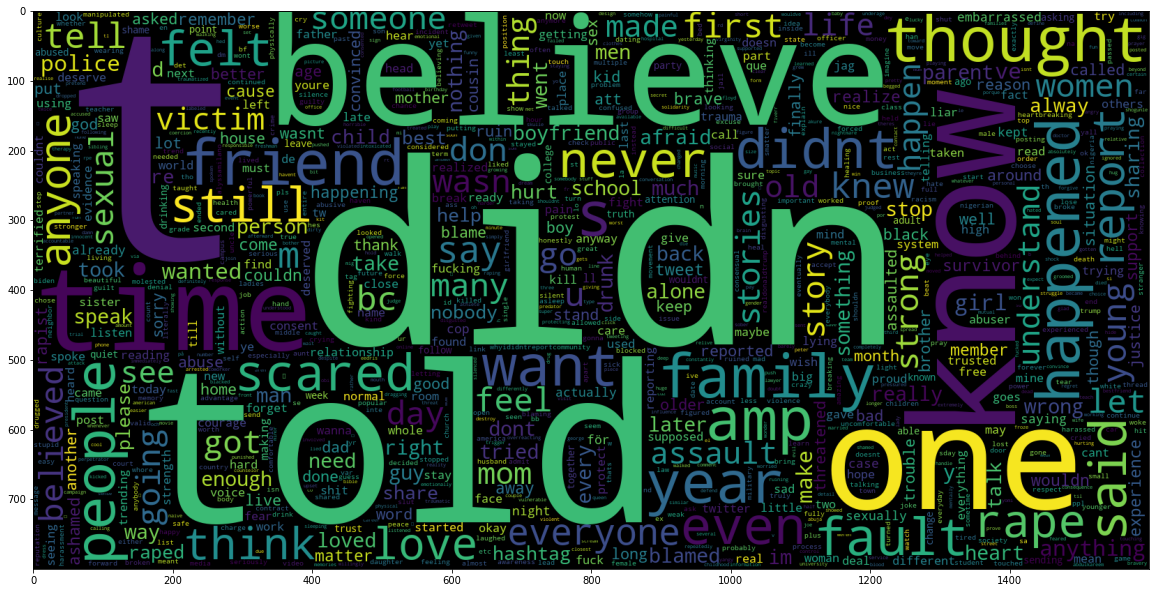

In [24]:
data_pos = df1['Tweet']
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800, collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

In [25]:
#create temporal dictionary
fearOfRetaliation_temp = "bullied, terrified, blackmail, kill, abduction, nightmares, revenge, violent, beat, bully, afraid, fear, feared, scared, know, dead, tell, abduct, strong, mean, mad, harassed, violence, threat, threatened, killed, death, pain, control, silence, destroy, intimidated, more trauma, fear of dismisaal, alcohol, drug, junkie, would kill, would beat, will kill, will beat, kill me, beat me"
ignorance_temp = "ignorance, manipulation, harsh, degradation, aggressive, illiteracy, toddler, kid, didn’t know, miseducation, age, didn’t know, love, young, know, realize, ignorant, child, molested, learned, learnt, naïve, guilt, girlfriend, children, taught, play, younger, knew, trusted, didn't understand, prey on, expoited, abused, lure, persuade, unconsious, assault" 
notSeriousOrFault_temp = "fault, deserved, drunk, immoral dressing, internalized, attitudes, mistake, deserve, blame, woman, courage, small, immoral, serious, sexual, raped, culture, hand, leg, almost, visit, touched, house, late, often, watched, drinking, smoking, night, lost, contract, self, normal, weed, attention seeking, married to him, seduce, seduction, provoked, angry, instigated, foreplay, consent, minor, underage, harassment, intoxicated"
negativeReactions_temp = "victim-blaming, stigmatization, ashamed, uncomfortable, embarrassed, pity, guilty, traumatized, confused, rejection, secret, ruin, reputation, image, position, kept, future, church, quiet, blame, labeling, character, paint, picture, depression, depressed, trauma, PTSD, emotional abuse, low self-esteem, self-doubt, shame, behaviour, identity, anxiety, mental health, social"
noProperAction_temp = "tardiness, take me seriously, believed me, police, report, reported, justice, believe, case, cop, believed, officer, liar, overreacting, overreact, court, support, understand, unbelief, truth, action, true, heal, blamed, barely, listen, process, denial, serious, postpone, aggressor, victim, women, jail, free, complaint, statement, workplace, lawyers, officials"
evidenceConcerns_temp = "evidence, dilemma, memory-loss, not enough, enough evidence, substantial, weak evidence, trace, valid, delay in reporting, no proof, justice system is broken, corrupt, tampering, absence, forensic, alleged, collection, DNA, body, clothes, issues"
perpetratorFactors_temp = "boss, rich, popular, father, brother, uncle, mom, dad, daddy, boyfriend, friend, brother, cousin, popularity, manager, bf, gf, neighbor, member, family, girlfriend, boyfriend, sex, job, good friend, godfather, partner, step-brother, employer, colleague, godmother, aunty, father-in-law, mother-in-law, step-father, step-mother, step-sister, armed robber, stranger,  sister, step brother"

#lemmatize the words in dictionary
fearOfRetaliation_temp = lm.lemmatize(fearOfRetaliation_temp)
ignorance_temp = lm.lemmatize(ignorance_temp)
notSeriousOrFault_temp = lm.lemmatize(notSeriousOrFault_temp)
negativeReactions_temp = lm.lemmatize(negativeReactions_temp)
noProperAction_temp = lm.lemmatize(noProperAction_temp)
evidenceConcerns_temp = lm.lemmatize(evidenceConcerns_temp)
perpetratorFactors_temp = lm.lemmatize(perpetratorFactors_temp)

#convert all words to lowercase and remove leading and ending spaces
fearOfRetaliation_temp = fearOfRetaliation_temp.lower().strip()
ignorance_temp = ignorance_temp.lower().strip()
notSeriousOrFault_temp = notSeriousOrFault_temp.lower().strip()
negativeReactions_temp = negativeReactions_temp.lower().strip()
noProperAction_temp = noProperAction_temp.lower().strip()
evidenceConcerns_temp = evidenceConcerns_temp.lower().strip()
perpetratorFactors_temp = perpetratorFactors_temp.lower().strip()

# #split the words or phrases based on commas (,)
fearOfRetaliation_temp = fearOfRetaliation_temp.split(",")
ignorance_temp = ignorance_temp.split(",")
notSeriousOrFault_temp = notSeriousOrFault_temp.split(",")
negativeReactions_temp = negativeReactions_temp.split(",")
noProperAction_temp = noProperAction_temp.split(",")
evidenceConcerns_temp = evidenceConcerns_temp.split(",")
perpetratorFactors_temp = perpetratorFactors_temp.split(",")

# #go through the dictionary and remove any other leading spaces
fearOfRetaliation = [i.lstrip() for i in fearOfRetaliation_temp]
ignorance = [i.lstrip() for i in ignorance_temp]
notSeriousOrFault = [i.lstrip() for i in notSeriousOrFault_temp]
negativeReactions = [i.lstrip() for i in negativeReactions_temp]
noProperAction = [i.lstrip() for i in noProperAction_temp]
evidenceConcerns = [i.lstrip() for i in evidenceConcerns_temp]
perpetratorFactors = [i.lstrip() for i in perpetratorFactors_temp]

#output results
print(fearOfRetaliation)
print(ignorance)
print(notSeriousOrFault)
print(negativeReactions)
print(noProperAction)
print(evidenceConcerns)
print(perpetratorFactors)

['bullied', 'terrified', 'blackmail', 'kill', 'abduction', 'nightmares', 'revenge', 'violent', 'beat', 'bully', 'afraid', 'fear', 'feared', 'scared', 'know', 'dead', 'tell', 'abduct', 'strong', 'mean', 'mad', 'harassed', 'violence', 'threat', 'threatened', 'killed', 'death', 'pain', 'control', 'silence', 'destroy', 'intimidated', 'more trauma', 'fear of dismisaal', 'alcohol', 'drug', 'junkie', 'would kill', 'would beat', 'will kill', 'will beat', 'kill me', 'beat me']
['ignorance', 'manipulation', 'harsh', 'degradation', 'aggressive', 'illiteracy', 'toddler', 'kid', 'didn’t know', 'miseducation', 'age', 'didn’t know', 'love', 'young', 'know', 'realize', 'ignorant', 'child', 'molested', 'learned', 'learnt', 'naïve', 'guilt', 'girlfriend', 'children', 'taught', 'play', 'younger', 'knew', 'trusted', "didn't understand", 'prey on', 'expoited', 'abused', 'lure', 'persuade', 'unconsious', 'assault']
['fault', 'deserved', 'drunk', 'immoral dressing', 'internalized', 'attitudes', 'mistake', 'd

In [26]:
def feature_extractor(text):
  #assign label indexes
  reason = {0:"Fear of retaliation from perpetrator" , 1:"Ignorant of assault", 
               2: "Considered assault as not serious or fault", 3: "Negative emotions from others", 
               4: "No Proper Action Taken for Prior Incidents", 5: "Evidence Concerns",
               6: "Perpetrator Factors", 7: "Anonyms and Non-personal Tweets."}

  #create score list and split received text
  score_list = [0,0,0,0,0,0,0,0]
  temp_list = text.split(" ")

  #for each word in the text, check if it's in any of the word lists
  #if it is, add a point to that list's score.
  #if it isn't add a point to the Anonymous score
  for word in temp_list:
    if fearOfRetaliation.count(word)>0: score_list[0] += 1
    elif ignorance.count(word)>0: score_list[1] += 1
    elif notSeriousOrFault.count(word)>0: score_list[2] += 1
    elif negativeReactions.count(word)>0: score_list[3] += 1
    elif noProperAction.count(word)>0: score_list[4] += 1
    elif evidenceConcerns.count(word)>0: score_list[5]+=1
    elif perpetratorFactors.count(word)>0: score_list[6]+=1
    else: score_list[7] += 1

  max = 0   #set base value

  #go through the current score list and check
  #if a particular score is greater than 0 and that score is not for anonymous
  #then set the maximum to that score
  for score in score_list:
    if score > max and score != score_list[7]: max = score

  #if the max is 0, meaning we didn't get scores for any other category,
  #set the category to Anonymous. But if we got a score higher than 0,
  #get that score's index and set the category
  if max == 0: 
    return reason[7]
  else: 
    return reason[score_list.index(max)]

#test the extractor
# print(feature_extractor("report rape threats email stalked classmate police school told problem one even tried help except my friends became bodyguards should be #whydonttheycare"))
print(feature_extractor("bullied terrified blackmail kill abduction"))

Fear of retaliation from perpetrator


In [27]:
def feature_list(text):
  #create score list and split received text
  score_list = [0,0,0,0,0,0,0,0]
  temp_list = text.split(" ")

  #for each word in the text, check if it's in any of the word lists
  #if it is, add a point to that list's score.
  #if it isn't add a point to the Anonymous score
  for word in temp_list:
    if fearOfRetaliation.count(word)>0: score_list[0] += 1
    elif ignorance.count(word)>0: score_list[1] += 1
    elif notSeriousOrFault.count(word)>0: score_list[2] += 1
    elif negativeReactions.count(word)>0: score_list[3] += 1
    elif noProperAction.count(word)>0: score_list[4] += 1
    elif evidenceConcerns.count(word)>0: score_list[5]+=1
    elif perpetratorFactors.count(word)>0: score_list[6]+=1
    else: score_list[7] += 1
  return score_list

#test the features list
print(feature_list("bullied terrified blackmail kill abduction"))

[5, 0, 0, 0, 0, 0, 0, 0]


In [28]:
df2 = df1

In [29]:
df2['OutCome'] = df2['Tweet'].apply(lambda x: feature_extractor(x))
df2['OutCome'].value_counts()

Anonyms and Non-personal Tweets.              8795
Fear of retaliation from perpetrator          6449
No Proper Action Taken for Prior Incidents    4373
Considered assault as not serious or fault    3486
Ignorant of assault                           3228
Perpetrator Factors                           2195
Negative emotions from others                 1210
Evidence Concerns                              118
Name: OutCome, dtype: int64

In [30]:
##Lists To Classify Text Into Different Classes 
"""
There Will Be Total of 8 Classes namely:- 
1. Fear of retaliation from perpetrator
2. Ignorant of Assault
3. Considered assault as not serious or fault
4. negative emotions from others
5. No proper action taken for prior incidents
6. Evidence concerns
7. Perpetrator factors
8. Anonymous or Non-personal
"""

'\nThere Will Be Total of 8 Classes namely:- \n1. Fear of retaliation from perpetrator\n2. Ignorant of Assault\n3. Considered assault as not serious or fault\n4. negative emotions from others\n5. No proper action taken for prior incidents\n6. Evidence concerns\n7. Perpetrator factors\n8. Anonymous or Non-personal\n'

In [31]:
df2['Features'] = df2['Tweet'].apply(lambda x: feature_list(x))
df2.head(5)

,Tweet,OutCome,Features
0,st charged rapes women farzam mehrabi accused...,No Proper Action Taken for Prior Incidents,"[0, 0, 0, 0, 2, 0, 0, 18]"
1,violador cristian villalobos ortodoncista chi...,Anonyms and Non-personal Tweets.,"[0, 0, 0, 0, 0, 0, 0, 17]"
2,,Anonyms and Non-personal Tweets.,"[0, 0, 0, 0, 0, 0, 0, 2]"
3,macfarlanenews friends trying murder suicidal ...,Negative emotions from others,"[0, 0, 0, 1, 0, 0, 0, 21]"
4,sixonw dahmers victims killed drugged sedativ...,Fear of retaliation from perpetrator,"[1, 0, 0, 0, 0, 0, 0, 18]"


In [32]:
df3 = df2.drop('Tweet',axis=1)

In [33]:
df3.head()

,OutCome,Features
0,No Proper Action Taken for Prior Incidents,"[0, 0, 0, 0, 2, 0, 0, 18]"
1,Anonyms and Non-personal Tweets.,"[0, 0, 0, 0, 0, 0, 0, 17]"
2,Anonyms and Non-personal Tweets.,"[0, 0, 0, 0, 0, 0, 0, 2]"
3,Negative emotions from others,"[0, 0, 0, 1, 0, 0, 0, 21]"
4,Fear of retaliation from perpetrator,"[1, 0, 0, 0, 0, 0, 0, 18]"


In [34]:
x = np.array(df3['Features'].tolist())
y = np.array(df3['OutCome'].tolist())

In [35]:
labelencoder = LabelEncoder()
y = to_categorical(labelencoder.fit_transform(y))

In [36]:
np.unique(y)

array([0., 1.], dtype=float32)

In [37]:
#split the main dataset into testing and training data. Use 30% of the data for training
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [38]:
# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)

In [39]:
# n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
# train_results = []
# test_results = []
# for estimator in n_estimators:
#   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
#   rf.fit(x_train, y_train)
#   train_pred = rf.predict(x_train)
#   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
#   roc_auc = auc(false_positive_rate, true_positive_rate)
#   train_results.append(roc_auc)
#   y_pred = rf.predict(x_test)
#   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
#   roc_auc = auc(false_positive_rate, true_positive_rate)
#   test_results.append(roc_auc)
# from matplotlib.legend_handler import HandlerLine2D
# line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
# line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
# plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
# plt.ylabel('AUC score')
# plt.xlabel('n_estimators')
# plt.show()

In [40]:
classifier = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=None, n_estimators=800, 
                            oob_score=True, max_features="auto", min_samples_leaf=50)

classifier.fit(x_train, y_train)

RandomForestClassifier(min_samples_leaf=50, n_estimators=800, n_jobs=-1,
                       oob_score=True, random_state=42)

In [41]:
#make predictions with the test data
y_predict = classifier.predict(x_test)

In [42]:
classifier.oob_score_

0.9326219074508303

In [43]:
print("Accuracy:", metrics.accuracy_score(y_test, y_predict))

Accuracy: 0.9306687506977783


In [44]:
# %matplotlib inline
# # Creating a bar plot
# sns.barplot(x=df3['OutCome'].index, y=df3['OutCome'])
# # Add labels to your graph
# plt.xlabel('Feature Importance Score')
# plt.ylabel('Features')
# plt.title("Visualizing Important Features")
# plt.legend()
# plt.show()